In [1]:
%matplotlib inline

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import skimage

from skimage import data, exposure, io, filters, feature, measure
from skimage.color import rgb2gray

In [35]:
class Load:
    
    def __init__(self):
        return
    
    def img(file):
        img = cv.imread("../res/"+file+".jpg")
        return img

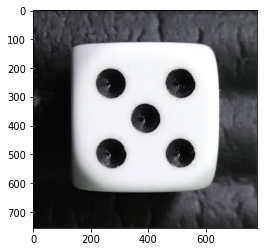

In [43]:
latwe0 = Load.img("latwe0")
plt.imshow(latwe0)

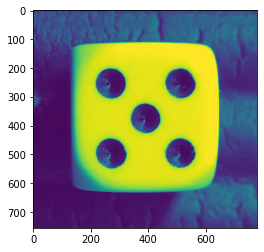

In [44]:
latwe0_grayscale = cv.cvtColor(latwe0, cv.COLOR_RGB2GRAY)
plt.imshow(latwe0_grayscale)

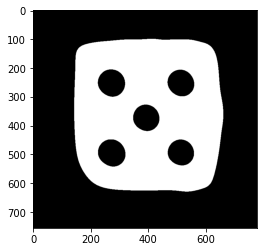

In [45]:
blur = skimage.filters.gaussian(latwe0_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
latwe0_normalized = mask.astype(np.uint8)
plt.imshow(latwe0_normalized, cmap='gray')

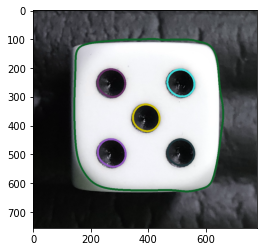

In [55]:
contours, hierarchy = cv.findContours(latwe0_normalized, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
drawing = np.zeros((latwe0_normalized.shape[0], latwe0_normalized.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(latwe0, contours, i, color, 5, cv.LINE_8, hierarchy, 0)
plt.imshow(latwe0, cmap='gray')